# 4.7 Example: Random Walks
The simulation of **random walks** provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk **starting at 0 with steps of 1 and –1 occurring with equal probability**

#### Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in `random` module:

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%time
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

Wall time: 997 µs


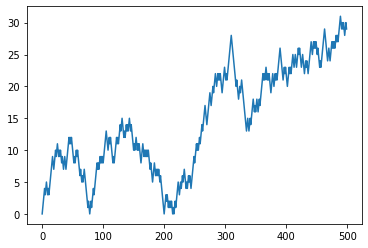

In [3]:
plt.plot(walk[:500])

#### We could use `np.random` module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [4]:
%%time
nsteps = 1000
draws = np.random.randint(0,2,size = nsteps)
steps = np.where(draws > 0,1,-1)
walk = steps.cumsum()

Wall time: 0 ns


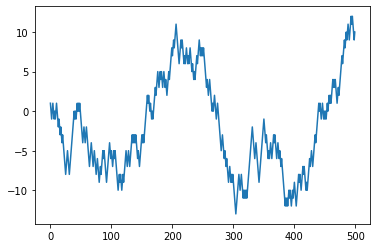

In [5]:
plt.plot(walk[:500])

* Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10

In [6]:
bool_lst = (np.abs(walk) >= 10)
bool_lst[:15]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

* we want the index of the first 10 or –10. Turns out, we can compute this using `argmax`, **which returns the first index of the maximum value in the boolean array**(True is the maximum value):

In [7]:
bool_lst.argmax()

111

## 1. Simulating Many Random Walks at Once
**If passed a 2D-tuple, the `numpy.random` functions will generate a two-dimensional array of draws,** and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [8]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ...,  12,  13,  14],
       [  1,   2,   3, ..., -48, -47, -48],
       [  1,   2,   3, ...,   0,  -1,   0],
       ...,
       [  1,   2,   1, ...,  28,  29,  28],
       [ -1,  -2,  -3, ..., -24, -23, -24],
       [  1,   2,   3, ...,  34,  35,  36]], dtype=int32)

In [9]:
print(walks.max())
print(walks.min())

113
-107


Out of these walks, let’s compute the **minimum crossing time to 30 or –30.** This is slightly tricky because not all 5,000 of them reach 30. We can check this using the `any` method:

In [10]:
hits30 = (np.abs(walks) >= 30).any(1) # any(axis = 1) by row
hits30

array([ True,  True, False, ...,  True,  True,  True])

In [11]:
hits30.sum()  # Number that hit 30 or -30

3410

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call `argmax` across `axis 1` to get the crossing times:

In [12]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

502.8240469208211

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. **You need only use a different random number generation function**, like `normal` to generate normally distributed steps with some mean and standard deviation:

In [13]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))
steps

array([[ 0.34266045,  0.10491481, -0.08579897, ..., -0.11283806,
        -0.00198744,  0.08650019],
       [-0.08336123,  0.50081209, -0.60921401, ...,  0.20289318,
         0.04185094,  0.28195453],
       [ 0.02551816, -0.76448299,  0.00989187, ..., -0.30245309,
         0.06665084, -0.34826319],
       ...,
       [ 0.2555952 , -0.11134795, -0.17493873, ...,  0.1061767 ,
         0.07431073,  0.15981659],
       [ 0.50401813,  0.24612853, -0.52525832, ..., -0.06786351,
        -0.4184127 ,  0.08110765],
       [ 0.29860868, -0.22724335, -0.02511479, ..., -0.01705255,
        -0.12479244, -0.15223145]])

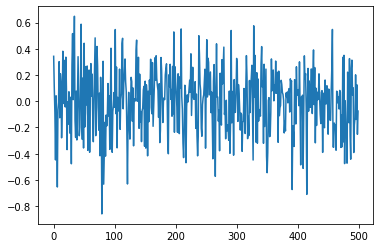

In [14]:
plt.plot(steps[0,:500])